In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
pip show keras


Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [4]:
pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


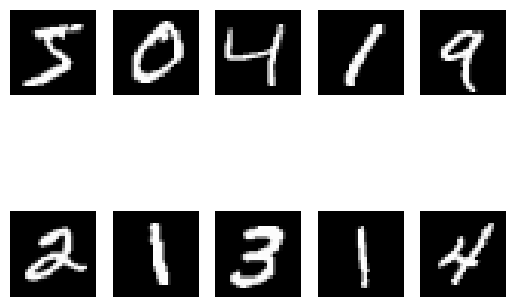

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

plt.subplot(251)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(252)
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(253)
plt.imshow(x_train[2],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(254)
plt.imshow(x_train[3],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(255)
plt.imshow(x_train[4],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(256)
plt.imshow(x_train[5],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(257)
plt.imshow(x_train[6],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(258)
plt.imshow(x_train[7],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(259)
plt.imshow(x_train[8],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(x_train[9],cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [8]:
trainx=x_train.astype('float32')
testx=x_test.astype('float32')
trainx=trainx/255.0
testx=testx/255.0

y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)
print('one hot encoded target training')
print(y_train[0:5,])
print('one hot encoded target testing')
print(y_test[0:5,])

(60000, 10)
(10000, 10)
one hot encoded target training
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
one hot encoded target testing
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
print('before reshaping')
print(trainx.shape)
print(testx.shape)

trainx=trainx.reshape(trainx.shape[0],28,28,1)
testx=testx.reshape(testx.shape[0],28,28,1)

print('after reshaping')
print(trainx.shape)
print(testx.shape)

before reshaping
(60000, 28, 28)
(10000, 28, 28)
after reshaping
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#Creating ANN models
#Method 1                   Sequential Model

model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#method 2                            Functional model
inputs=Input(shape=(28,28,1))
x=Flatten()(inputs)
x=Dense(16,activation='relu')(x)
x=Dense(32,activation='relu')(x)
outputs=Dense(10,activation='softmax')(x)
model=Model(inputs=inputs,outputs=outputs)
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,434 (52.48 KB)

 Trainable params: 13,434 (52.48 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#method 3                    Subclass method
class Custom:
  def __init__(self):
    self.flatten=Flatten()
    self.dense1=Dense(16,activation='relu')
    self.dense2=Dense(32,activation='relu')
    self.dense3=Dense(10,activation='softmax')
  def call(self,shape):
    self.inp=Input(shape)
    x=self.flatten(self.inp)
    x=self.dense1(x)
    x=self.dense2(x)
    final=self.dense3(x)
    model=Model(inputs=self.inp,outputs=final)
    return model
m=Custom()
model=m.call((28,28,1))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,434 (52.48 KB)

 Trainable params: 13,434 (52.48 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Compile and train model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(trainx,y_train,epochs=50,batch_size=128,validation_data=(testx,y_test), verbose=1)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9526 - loss: 0.1601 - val_accuracy: 0.9503 - val_loss: 0.1653
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9573 - loss: 0.1522 - val_accuracy: 0.9527 - val_loss: 0.1591
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9574 - loss: 0.1436 - val_accuracy: 0.9547 - val_loss: 0.1531
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1346 - val_accuracy: 0.9550 - val_loss: 0.1558
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9619 - loss: 0.1306 - val_accuracy: 0.9570 - val_loss: 0.1471
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1235 - val_accuracy: 0.9559 - val_loss: 0.1486
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9637 - loss: 0.1217 - val_accuracy: 0.9545 - val_loss: 0.1455
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9662 - loss: 0.1151 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


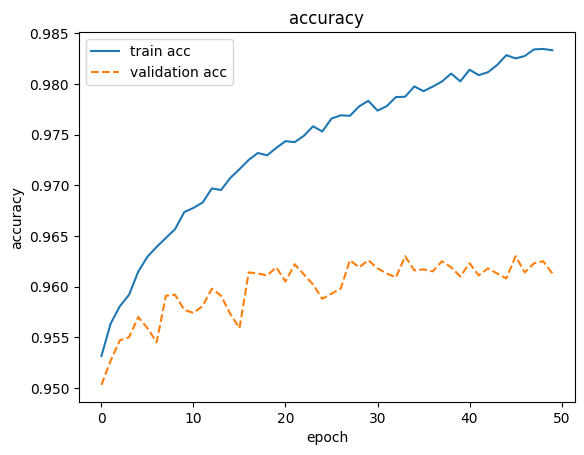

Text(0.5, 1.0, 'loss')

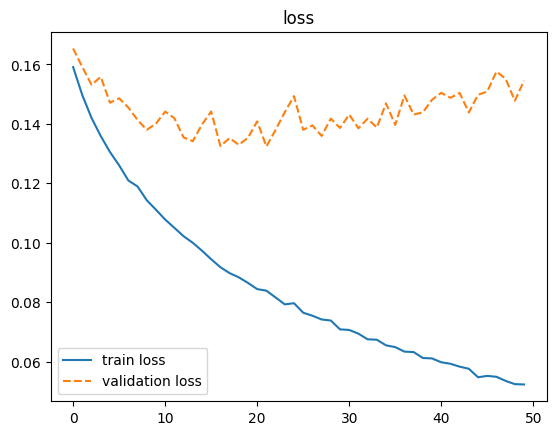

In [19]:
print(history.history.keys())
#accuracy
f,ax=plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'],'--')
ax.legend(['train acc','validation acc'])
ax.set_title('accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.show()
#loss
f,ax=plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'],'--')
ax.legend(['train loss','validation loss'])
ax.set_title('loss')

In [22]:
#model evaluation
score=model.evaluate(testx,y_test,verbose=0)
print('Test Loss',score[0])
print('Test Accuracy',score[1])

Test Loss 0.15451674163341522
Test Accuracy 0.9613000154495239


In [26]:
#model Prediction
y_pred=model.predict(testx)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)
print('test hand written')
print(y_test_class[:20])
print('predicted hand written')
print(y_pred_class[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
test hand written
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
predicted hand written
[7 2 1 0 4 1 4 4 5 9 0 6 9 0 1 5 9 7 3 4]


In [29]:
#performance evaluation
from sklearn.metrics import confusion_matrix,classification_report
print('performance matrix')
matrixs=classification_report(y_test_class,y_pred_class)
print(matrixs)
cm=confusion_matrix(y_test_class,y_pred_class)
print(cm)

performance matrix
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.96      0.94      0.95       892
           6       0.95      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

[[ 958    0    2    1    0    3   10    1    3    2]
 [   0 1107    5    3    0    1    4    3   11    1]
 [   5    0  997    5    0    0    6    7   10    2]
 [   0    0    9  975    0    6    2    5    9    4]
 [   1    

In [30]:
#CNN method

In [35]:
model=Sequential()
#LeNet5
#c1 convolution layer
model.add(Conv2D(6,activation='relu',input_shape=(28,28,1),kernel_size=(5,5),strides=(1,1),padding='same'))
#s2 pooling layer
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#c3 convolution layer
model.add(Conv2D(16,activation='relu',kernel_size=(5,5),strides=(1,1),padding='same'))
#s4 pooling layer
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#c5 convolution layer
model.add(Conv2D(120,activation='relu',kernel_size=(5,5),strides=(1,1),padding='valid'))
#flatten
model.add(Flatten())
#fc6 fully connected layer
model.add(Dense(84,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 7, 7, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1080)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 84)                  │          90,804 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,346 (556.04 KB)

 Trainable params: 142,346 (556.04 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#compile and train
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(trainx,y_train,epochs=2,batch_size=128,validation_data=(testx,y_test), verbose=1)

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9895 - val_loss: 0.0352
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9929 - loss: 0.0225 - val_accuracy: 0.9896 - val_loss: 0.0363


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


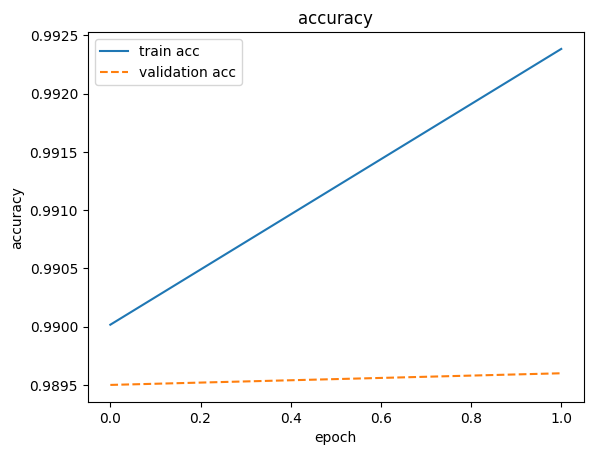

Text(0.5, 1.0, 'loss')

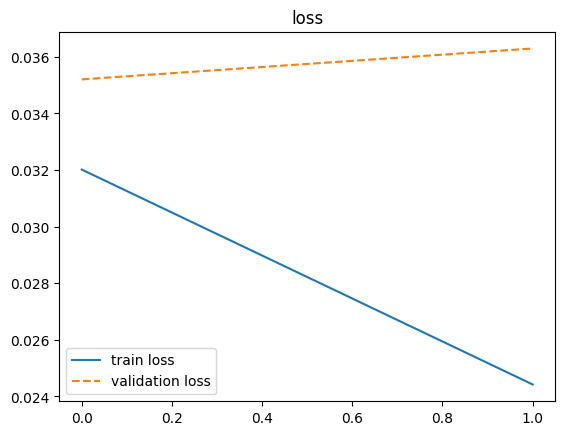

In [39]:
print(history.history.keys())
#accuracy
f,ax=plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'],'--')
ax.legend(['train acc','validation acc'])
ax.set_title('accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.show()
#loss
f,ax=plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'],'--')
ax.legend(['train loss','validation loss'])
ax.set_title('loss')

In [40]:
#model evaluation
score=model.evaluate(testx,y_test,verbose=0)
print('Test Loss',score[0])
print('Test Accuracy',score[1])

Test Loss 0.036293789744377136
Test Accuracy 0.9896000027656555


In [41]:
#performance evaluation
from sklearn.metrics import confusion_matrix,classification_report
print('performance matrix')
matrixs=classification_report(y_test_class,y_pred_class)
print(matrixs)
cm=confusion_matrix(y_test_class,y_pred_class)
print(cm)

performance matrix
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.96      0.94      0.95       892
           6       0.95      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

[[ 958    0    2    1    0    3   10    1    3    2]
 [   0 1107    5    3    0    1    4    3   11    1]
 [   5    0  997    5    0    0    6    7   10    2]
 [   0    0    9  975    0    6    2    5    9    4]
 [   1    